In [1]:
!pip install seaborn
!pip install tensorflow
!pip install pandas
!pip install -U scikit-learn scipy matplotlib

distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/includ

distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/lib/python3.8/dist-packages
sysconfig: /usr/lib/python3.8/site-packages
distutils: /usr/local/include/python3.8/UNKNOWN
sysconfig: /usr/include/python3.8
distutils: /usr/local/bin
sysconfig: /usr/bin
distutils: /usr/local
sysconfig: /usr
user = False
home = None
root = None
prefix = None
Defaulting to user installation because normal site-packages is not writeable
distutils: /home/alessandro/.local/include/python3.8/UNKNOWN
sysconfig: /home/alessandro/.local/include/python3.8
user = True
home = None
root = None
prefix = None
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.

### Importo le librerie utili per lavorare sui dati

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns # For creating plots
import matplotlib.ticker as mtick # For specifying the axes tick format 
import matplotlib.pyplot as plt
import seaborn as sns

#Importo test e test set
train_raw = pd.read_csv("./train.csv")
test_raw = pd.read_csv("./test.csv")

## Analisi dei dati di train e test, verifiche .

In [3]:
train_raw  #dati di train

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,8589,15742809,Mironova,712,Spain,Female,29,7,77919.78,1,1,0,122547.58
1,0,3179,15609669,Chuang,542,France,Female,39,4,109949.39,2,1,1,41268.65
2,0,5201,15641298,Corones,512,Germany,Male,42,9,93955.83,2,1,0,14828.54
3,0,8890,15777046,Parry,580,France,Female,39,9,128362.59,1,1,0,86044.98
4,1,5790,15726103,Tsou,689,Germany,Female,55,1,76296.81,1,1,0,42364.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,8872,15699524,Howells,466,France,Female,30,3,0.00,1,1,0,193984.60
5996,0,9827,15686917,Tu,789,Spain,Female,40,4,0.00,2,1,0,137402.27
5997,0,5269,15687648,Nicholson,691,France,Male,28,1,0.00,2,0,0,92865.41
5998,0,9667,15781689,Macadam,758,Spain,Male,35,5,0.00,2,1,0,95009.60


In [4]:
train_raw.columns.values    #valori dei dati di train

array(['Exited', 'RowNumber', 'CustomerId', 'Surname', 'CreditScore',
       'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary'], dtype=object)

-----------------------------------------------------------------------------------------------------------------

In [5]:
test_raw   #dati di test

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,3189,15586757,Anenechukwu,801,France,Female,32,4,75170.54,1,1,1,37898.50
1,0,8294,15770711,Lu,766,Germany,Female,28,4,90696.78,1,0,1,21597.20
2,0,1711,15567993,Palmer,828,Spain,Male,28,8,134766.85,1,1,0,79355.87
3,0,7511,15729377,Ku,798,France,Male,36,1,0.00,2,1,1,159044.10
4,0,1462,15640627,Wan,611,Spain,Male,34,4,0.00,2,1,0,170950.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,0,2835,15649124,Fang,850,France,Male,30,9,121535.18,1,0,0,40313.47
1996,0,450,15658169,Cook,778,Spain,Female,47,6,127299.34,2,1,0,124694.99
1997,0,6687,15641285,Yusupova,621,Spain,Male,50,3,163085.79,1,0,1,131048.36
1998,0,3562,15614302,Crotty,699,Germany,Female,31,10,125837.86,2,1,0,189392.66


In [6]:
test_raw.columns.values    #valori dei dati di test

array(['Exited', 'RowNumber', 'CustomerId', 'Surname', 'CreditScore',
       'Geography', 'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary'], dtype=object)

----------------------------------------------------------------------------------------------------------------

In [7]:
train_raw.dtypes

Exited               int64
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

In [8]:
test_raw.dtypes

Exited               int64
RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
dtype: object

Visualizzo le tipologie dei dati sia train che test

-----------------------------------------------------------------------------------------------------------------


In [9]:
train_raw.isnull().sum()

Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [10]:
test_raw.isnull().sum()

Exited             0
RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

Verifico sei vi sono dei valori nulli , in questo caso non sembrano essere presenti . Nel caso in cui ci fossero e dovrei provvedere a eliminarli lo posso fare con il seguente comando 

#Rimuovere i valori mancanti (nAn) ---> 
train_raw.dropna(inplace = True)

## Grafico i primi dati , per avere delle idee iniziali .

<AxesSubplot:title={'center':'Correlazione dei dati di Train'}>

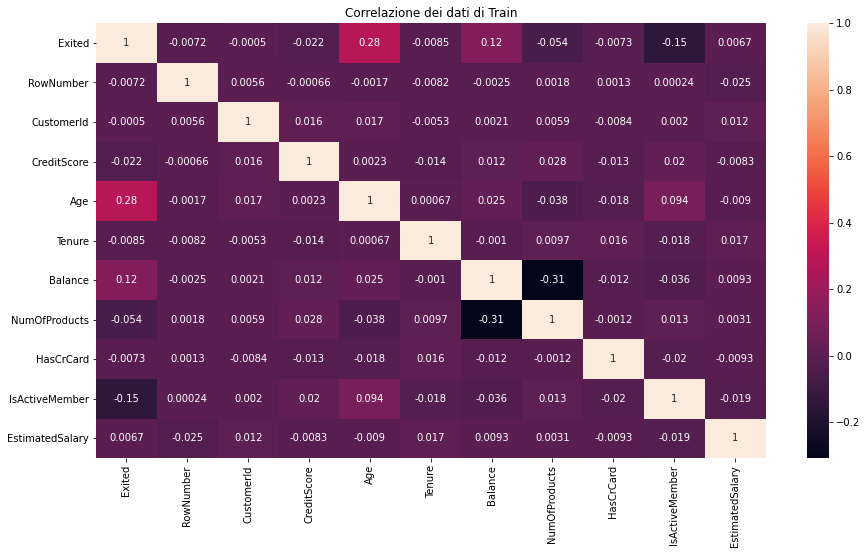

In [11]:
plt.figure(figsize=(15,8))
plt.title("Correlazione dei dati di Train")
sns.heatmap(data=train_raw.corr(), annot=True)

Il concetto di correlazione è di fondamentale importanza poichè ci consente di capire quanto due variabili sono correlate(legate) fa loro . Una correlazione potrebbe essere positiva, nel senso che entrambe le variabili si muovono nella stessa direzione, o negativa, nel senso che quando il valore di una variabile aumenta, i valori delle altre variabili diminuiscono. La correlazione può anche essere neutra o zero, il che significa che le variabili non sono correlate. A noi interessa vedere la correlazione con l'Exited ovviamente quindi considereremo questa nel grafico sottostante.

<AxesSubplot:>

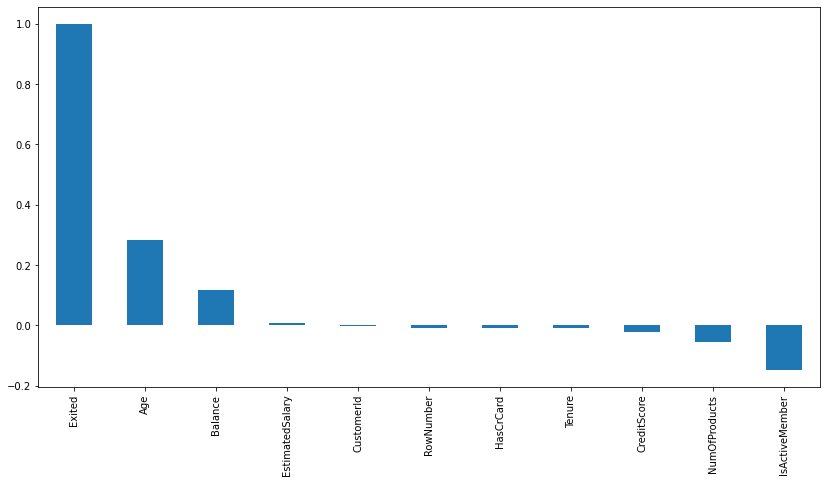

In [12]:
plt.figure(figsize=(14,7))
train_raw.corr()['Exited'].sort_values(ascending = False).plot(kind='bar')

Possiamo notare che dati come isActiveMember , NumOfProducts hanno correlazione bassissima o anzi negativa sono praticamente inutili per le nostre future analisi , non sono per niente correlate con l'Exited . Sarebbe giusto utilizzarle magari per altri scopi , e quindi dovrebbero essere eliminate . E' curioso notare invece come l'età sia correlata in modo ""abbastanza"" forte con l'Exited (cioè se si cambia banca oppure no) .
#### NB : Questa è solo una prima analisi , non ho ancora usato l'encoder  , quindi non ho preso in considerazione Gender , Geography , Surname , RawsNumber e CustomerID (anche se so per certo che almeno queste ultime tre non mi saranno per niente utili per l'analisi dei dati.) Ricalcolerò la correlazione successivamente anche per vedere se le mie previsioni possano essere giuste !
### Inizio con l'analizzare le feature prese meno in considerazione !

Capiamo di piu riguardo la posizione Geografica !

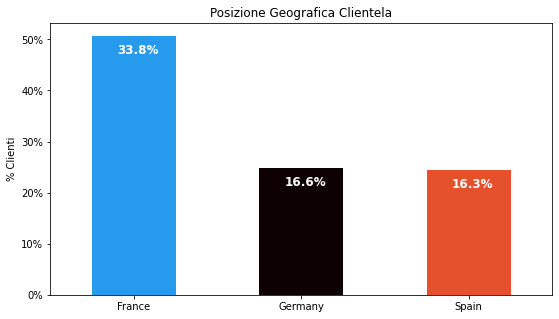

In [13]:
colors = ['#269AED','#0E0101','#E4512B']
ax = (train_raw['Geography'].value_counts()*100.0 /len(train_raw)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors, figsize=(9,5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Clienti')
ax.set_title('Posizione Geografica Clientela')

# creo un elenco per raccogliere i dati plt.patches
totals = []

#trova i valori e aggiungi alla lista
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)
#per le %
for i in ax.patches:
    # get_width sinistra o destra; get_y su o giu
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Come possiamo vedere la clientela di tipo francese è circa il doppio rispetto a spagnoli e tedeschi , vi sono solamente 3 nazionalità ! Presumo che le banche possano essere fisicamente solo in Spagna , Francia e Germania. E magari chi è costretto per qualsiasi motivo a cambiare nazione probabilmente potrebbe avere il bisogno di cambiare filiale , per facilitare tutte le operazioni previste .

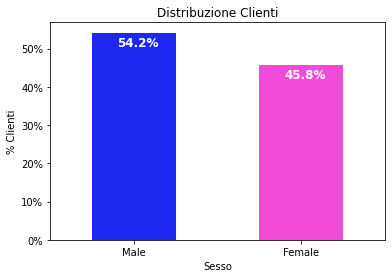

In [14]:
colors = ['#1D27ED','#F04CD8']
ax = (train_raw['Gender'].value_counts()*100.0 /len(train_raw)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Clienti')
ax.set_xlabel('Sesso')
ax.set_title('Distribuzione Clienti')

# creo un elenco per raccogliere i dati plt.patches
totals = []

#trova i valori e aggiungi alla lista
for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
    # get_width sinistra o destra; get_y su o giu
    ax.text(i.get_x()+.15, i.get_height()-3.5, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold')

Come possiamo vedere la distribuzione dei maschi rispetto alle femmine è quasi equa , abbiamo un 8,4% di maschi in piu .

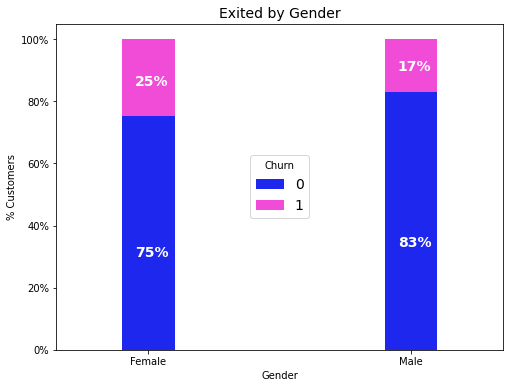

In [15]:
colors = ['#1D27ED','#F04CD8']
gender_churn = train_raw.groupby(['Gender','Exited']).size().unstack()

ax = (gender_churn.T*100.0 / gender_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.2,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (8,6),
                                                                color = colors)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Exited by Gender',size = 14)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

Il tasso di abbandono è piu elevato nelle donne che negli uomini .

-----------------------------------------------------------------------------------------------------------------

### Prendo in considerazione i valori chiavi ovvero quelli di Exited
#### NB : assumo per tutto lo studio che Exited=1 sta per "il cliente cambia banca " , mentre Exited=0 "il cliente NON cambia banca "

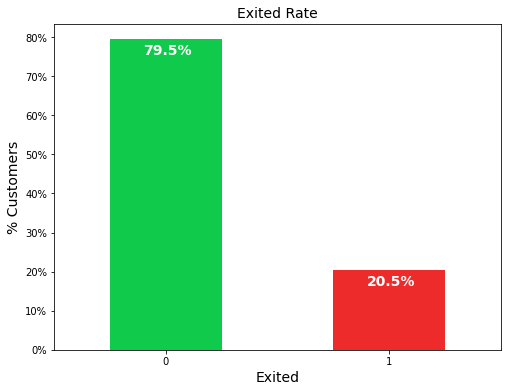

In [16]:
colors = ['#10CB4B','#EE2B2B']
ax = (train_raw['Exited'].value_counts()*100.0 /len(train_raw)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Exited',size = 14)
ax.set_title('Exited Rate', size = 14)


totals = []


for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
 
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

Il grafico parla chiaro e ci dice che il 79.5% delle persone non abbandona la banca mentre il 20.5% si . Mi aspettavo sinceramente un tasso di NON abbandono un po piu elevato . I dati non sono stati del tutto trattati quindi potrebbero esserci dei falsi negativi , delle asimmetrie che dovremmo individuare e correggere

### Mentre abbiamo potuto vedere dai grafici generati in precedenza che l'età è correlata piu strettamente con Exited e a seguire l'ammontare del conto in banca (Balance) , quindi analizzo con piu cura (tramite grafici) queste due features

In [17]:
etaCount = train_raw.groupby('Age')['Exited'].agg(['count'])
etaCount["media"]=train_raw['Age'].value_counts()*100.0 /len(train_raw) #calcolo media
etaCount.sort_values("count" , ascending=False) #ordinamento

,count,media
Age,,
37,312,5.200000
35,297,4.950000
38,293,4.883333
36,267,4.450000
33,260,4.333333
...,...,...
78,4,0.066667
79,3,0.050000
81,3,0.050000


Ci sono 312 persone che hanno 37 anni e sono il gruppo piu grande, essi rappresentano il 5,2% del totale. Mentre il valore piu basso lo rappresenta l'unica persona che ha 83 anni . Interessante vedere che il picco di persone affiliate alla banca si aggira attorno alla 30ina di anni . Mentre molti meno gli anziani. 

Riporto sottoforma di grafico..

Text(0.5, 1.0, '% of Età')

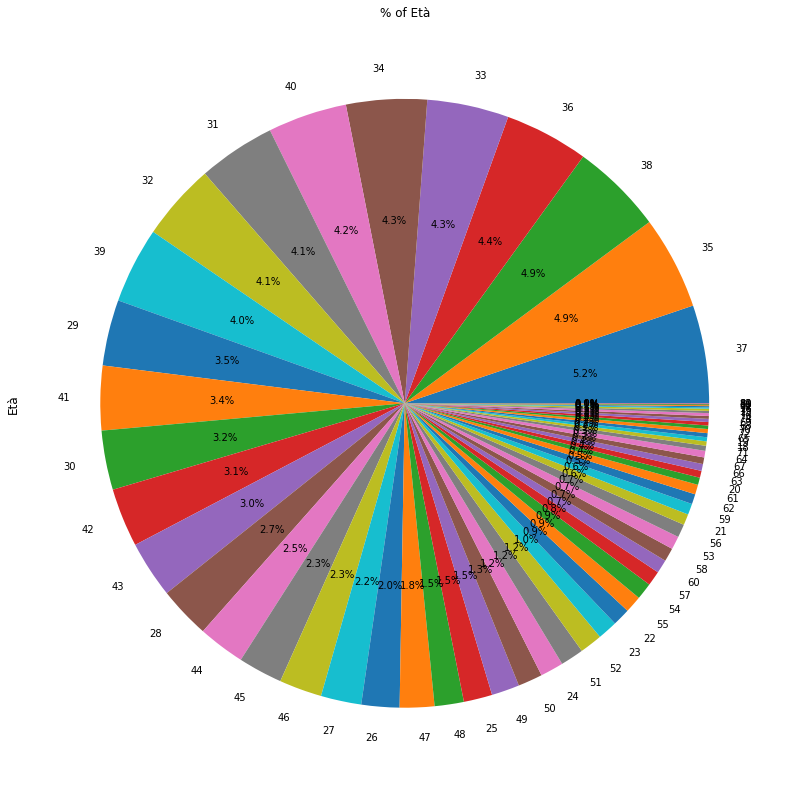

In [18]:
ax = (train_raw['Age'].value_counts()*100.0 /len(train_raw))\
.plot.pie(autopct='%.1f%%',figsize =(14,14), fontsize = 10 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Età',fontsize = 12)
ax.set_title('% of Età', fontsize = 12)

Ci sono piu clienti che hanno un età media distribuita tra i 28 ai 46 anni (piu o meno) , in basso a destra percentuali piccolissime, rispecchiano quello detto a parole nelle celle precedenti .

Text(0.5, 1.0, 'Total Customer by Age')

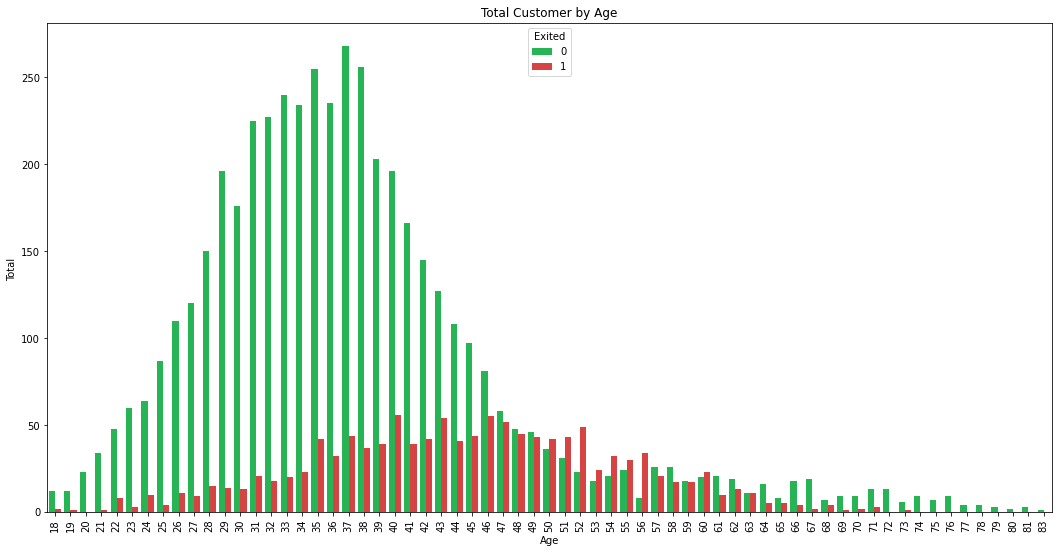

In [19]:
ax = plt.subplots(figsize = (18,9))

ax = sns.countplot(x="Age", hue="Exited", data=train_raw , palette=['#10CB4B','#EE2B2B'])
plt.xticks(rotation= 90)
plt.xlabel('Age')
plt.ylabel('Total ')
plt.title("Total Customer by Age")

Questo grafico ci da diverse informazioni importanti,  la prima è che gli utenti che stanno intergendo con la banca precisamente hanno un'età compresa fra i 18 e 83 anni . Ci sono molti utenti compresi fra la fascia di età che va dai 29 ai 40 anni . Un cliente su due(circa) compreso nell'età che va dai 47,48,49 abbandona la banca .
Invece l'età piu critica è quella che va dai 50 ai 55 anni , ci sono piu persone che abbandonano rispetto a quelle che restano fedeli alla banca.

### Analisi rispetto a Balance

/home/alessandro/.local/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, '# of Customers by their Balance')

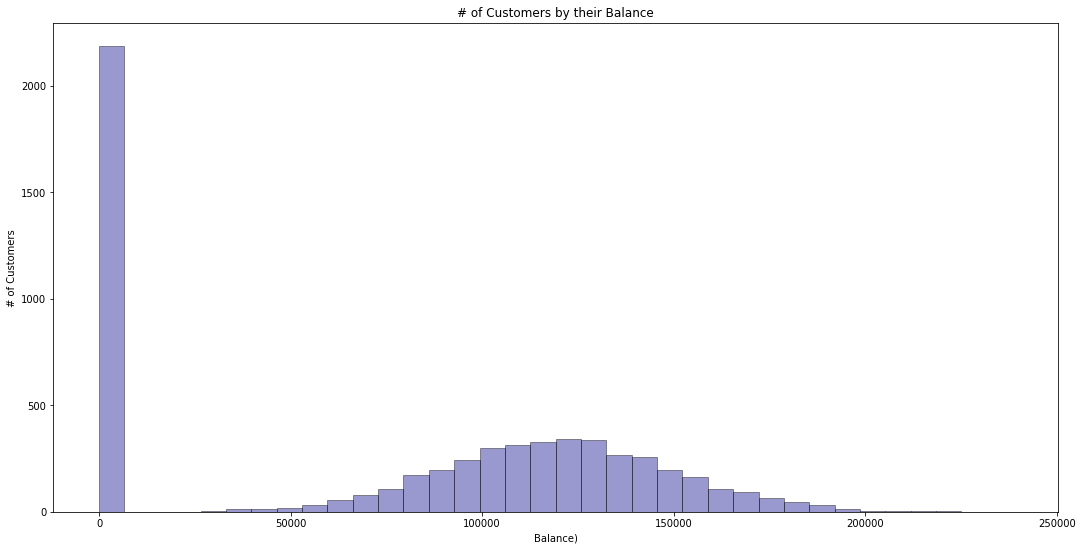

In [20]:
ax = plt.subplots(figsize = (18,9))
ax = sns.distplot(train_raw['Balance'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('# of Customers')
ax.set_xlabel('Balance)')
ax.set_title('# of Customers by their Balance')

Molte persone hanno 0 soldi nel conto in banca , sono in estrema maggioranza rispetto alle altre! Il picco iniziale infatti è elevatissimo! 
##### NB : Potrebbe essere generato un avviso di WARNING !

### Vediamo se le persone con pochi soldi sono piu propense ad abbandonare oppure no 

In [21]:
custPoor= train_raw.loc[train_raw['Balance'] <= 0]
custPoor

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
5,0,1267,15749050,Justice,548,France,Female,36,3,0.0,1,1,0,65996.90
11,0,4248,15677906,Owens,637,Spain,Female,54,5,0.0,1,0,1,150836.98
13,0,3515,15757911,Trevisani,643,Spain,Female,32,2,0.0,1,0,0,131301.74
14,0,576,15653620,Gordon,546,France,Female,27,8,0.0,2,1,1,14858.10
19,0,3076,15594577,De Luca,556,France,Male,35,10,0.0,2,1,1,192751.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,0,8872,15699524,Howells,466,France,Female,30,3,0.0,1,1,0,193984.60
5996,0,9827,15686917,Tu,789,Spain,Female,40,4,0.0,2,1,0,137402.27
5997,0,5269,15687648,Nicholson,691,France,Male,28,1,0.0,2,0,0,92865.41
5998,0,9667,15781689,Macadam,758,Spain,Male,35,5,0.0,2,1,0,95009.60


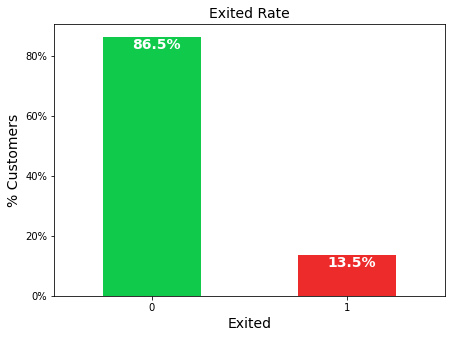

In [22]:
colors = ['#10CB4B','#EE2B2B']
ax = (custPoor['Exited'].value_counts()*100.0 /len(custPoor)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (7,5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Exited',size = 14)
ax.set_title('Exited Rate', size = 14)


totals = []


for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
 
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

 Come possiamo vedere la percentuale di NON abbandono quando abbiamo l'ammontare del conto in banca pari a 0 è del 86,5% (abbastanza elevata) ... magari le tasse relative ai conti correnti bancari non ci sono e quindi non è un peso tenere il conto attivo. I clienti che non tengono soldi nel conto sono 2185 .

In [23]:
custNotPoor= train_raw.loc[train_raw['Balance'] > 0]
custNotPoor

,Exited,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,8589,15742809,Mironova,712,Spain,Female,29,7,77919.78,1,1,0,122547.58
1,0,3179,15609669,Chuang,542,France,Female,39,4,109949.39,2,1,1,41268.65
2,0,5201,15641298,Corones,512,Germany,Male,42,9,93955.83,2,1,0,14828.54
3,0,8890,15777046,Parry,580,France,Female,39,9,128362.59,1,1,0,86044.98
4,1,5790,15726103,Tsou,689,Germany,Female,55,1,76296.81,1,1,0,42364.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5986,0,2975,15746737,Eames,565,Germany,Male,59,9,69129.59,1,1,1,170705.53
5987,0,2189,15799211,Anenechi,708,Spain,Female,32,8,187487.63,1,1,1,120115.50
5988,0,8431,15775949,Trevisani,612,France,Female,38,7,110615.47,1,1,1,193502.93
5991,0,6380,15770543,Lowe,679,France,Male,37,7,74260.03,1,1,0,194617.98


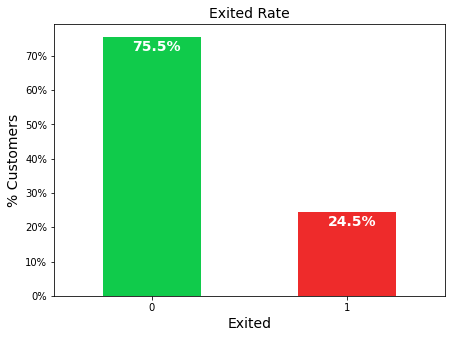

In [24]:
colors = ['#10CB4B','#EE2B2B']
ax = (custNotPoor['Exited'].value_counts()*100.0 /len(custNotPoor)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (7,5))
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Exited',size = 14)
ax.set_title('Exited Rate', size = 14)


totals = []


for i in ax.patches:
    totals.append(i.get_width())

total = sum(totals)

for i in ax.patches:
 
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

Come possiamo vedere la percentuale di abbandono quando abbiamo l'ammontare del conto in banca maggiore di 0 è del 24,5% abbastanza piu elevato rispetto a prima (13,5%). I clienti che tengono soldi nel conto però in questo caso sono 3815 . Quindi anche se non abbiamo proprio le stesse proporzioni quasi il doppio dei clienti che hanno soldi in banca rischiano di lasciarla rispetto a chi non ha soldi nel conto!!!

##### NB : Dato che i dati di balance sono molti e quasi tutti diversi tranne i valori = 0 , per un'analisi più semplificata e ragionevole sarebbe tornato utile raggrupparli per fasce di Balance... anche per semplificare i grafici o aggiungerne altri piu significativi . 

-----------------------------------------------------------------------------------------------------------------

## Procedo nell'eliminare le feature che reputo poco importanti per le analisi successive e quindi per lo studio dell'accuracy .
Come specificato nel paragrafo sopra , Surname, CustomerId , RowNumber sono dati inutili per le nostre future analisi , quindi li elimino.
Piu che altro trovo sensato eliminarle anche per avere un codice piu pulito e veloce.

In [25]:
tr2= train_raw.drop(["CustomerId", "Surname", "RowNumber"], axis=1)
tr2.head()

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,712,Spain,Female,29,7,77919.78,1,1,0,122547.58
1,0,542,France,Female,39,4,109949.39,2,1,1,41268.65
2,0,512,Germany,Male,42,9,93955.83,2,1,0,14828.54
3,0,580,France,Female,39,9,128362.59,1,1,0,86044.98
4,1,689,Germany,Female,55,1,76296.81,1,1,0,42364.75


In [26]:
ts2= test_raw.drop(["CustomerId", "Surname","RowNumber"], axis=1)
ts2.head()

,Exited,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,0,801,France,Female,32,4,75170.54,1,1,1,37898.50
1,0,766,Germany,Female,28,4,90696.78,1,0,1,21597.20
2,0,828,Spain,Male,28,8,134766.85,1,1,0,79355.87
3,0,798,France,Male,36,1,0.00,2,1,1,159044.10
4,0,611,Spain,Male,34,4,0.00,2,1,0,170950.58


In [27]:
tr2.duplicated().sum()  #mi dice quante linee sono duplicate 

0

In [28]:
ts2.duplicated().sum()  #mi dice quante linee sono duplicate 

0

Non ho righe duplicate sia per train che test , senno provvedevo ad eliminarle!

In [29]:
tr2_dummies = pd.get_dummies(tr2)
tr2_dummies.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,712,29,7,77919.78,1,1,0,122547.58,0,0,1,1,0
1,0,542,39,4,109949.39,2,1,1,41268.65,1,0,0,1,0
2,0,512,42,9,93955.83,2,1,0,14828.54,0,1,0,0,1
3,0,580,39,9,128362.59,1,1,0,86044.98,1,0,0,1,0
4,1,689,55,1,76296.81,1,1,0,42364.75,0,1,0,1,0


In [30]:
ts2_dummies = pd.get_dummies(ts2)
ts2_dummies.head()

,Exited,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,0,801,32,4,75170.54,1,1,1,37898.50,1,0,0,1,0
1,0,766,28,4,90696.78,1,0,1,21597.20,0,1,0,1,0
2,0,828,28,8,134766.85,1,1,0,79355.87,0,0,1,0,1
3,0,798,36,1,0.00,2,1,1,159044.10,1,0,0,0,1
4,0,611,34,4,0.00,2,1,0,170950.58,0,0,1,0,1


Ho convertito i valori di Gender e Geography , utilizzando questo metodo get_dummies che funziona nello stesso modo di un encoder! Ovviamente tutto è stato fatto sia per train che test .
#### Come detto in precedenza ora ricalcolerò la correlazione tra le feature per vedere quanto possano influire Gender e Geography su Exited dato che in precedenza mi ero fatto solamente un'idea

<AxesSubplot:title={'center':'Correlazione dei dati di Train'}>

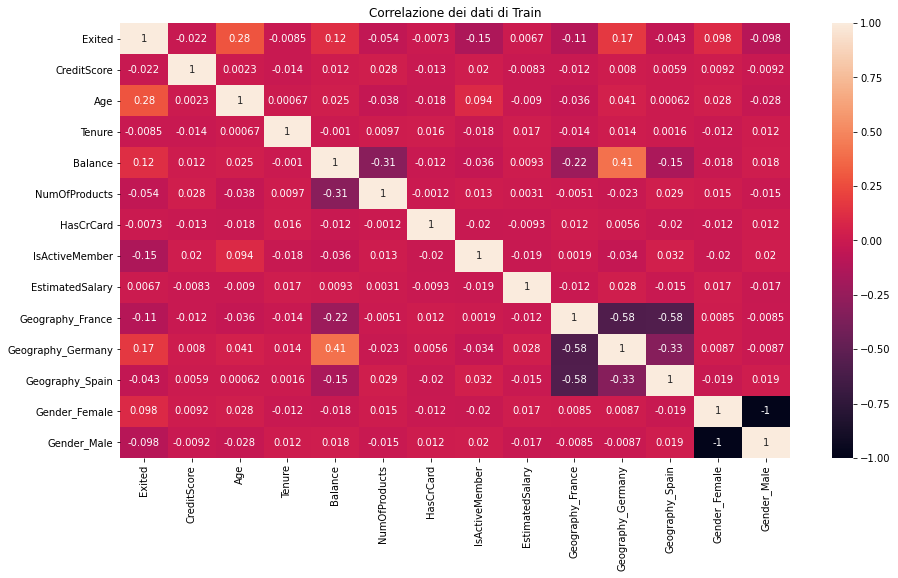

In [31]:
plt.figure(figsize=(15,8))
plt.title("Correlazione dei dati di Train")
sns.heatmap(data=tr2_dummies.corr(), annot=True)

Otteniamo dei risultati abbastanza interessanti , rimangono invariati i dati visti in precedenza .Ci sono delle novita! Il sesso femminile sembra avere una correlazione molto più alta con l'Exited rispetto al sesso maschile e per quanto riguarda la posizione geografica invece la Germania sembra essere la piu correlata delle 3 con l'Exited . Grazie al dummies ho ottenuto dei dati abbastanza interessanti e diciamo alcuni di essi quasi inaspettati, li utilizzerò per addestrare la rete e puntare ad un accuracy abbastanza elevata!
#### NB : molte features hanno una correlazione bassa se non negativa e quindi elidendole oppure no cambierebbe molto poco (ho gia fatto delle prove) , decido di lasciarle giusto per un'analisi piu dettagliata e esplicativa . L'intera analisi quindi sarà svolta droppando solamente CustomerID , RowNumber e Surname

Dovevo procedere applicando lo Scaler es.MinMaxScaler su variabili NON categoriche , esso mi permette di normalizzare i dati nell'intervallo 0 , 1 . Dopo svariate prove ho deciso di non applicarlo poichè i risultati rimanevano invariati , ma ne conosco l'uso e l'applicazione , in questo caso i risultati erano davvero identici .

# Addestramento dei dati

In [32]:
x_train = tr2_dummies.drop(["Exited"], axis=1)
y_train = tr2_dummies["Exited"]

x_test = ts2_dummies.drop(["Exited"], axis=1)
y_test = ts2_dummies["Exited"]

### Decision Tree Classifier 

In [33]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(criterion = 'entropy')
tree.fit(x_train, y_train)

print("Accuracy: {:0.2f}%".format(tree.score(x_test, y_test)*100))

Accuracy: 79.05%


Accuracy non elevatissima , proverò infatti ad applicare un altro algoritmo, non approfondisco il discorso sull'algoritmo poichè è stato trattato all'interno del corso . 

### Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

La funzione fit() crea il modello previsionale, ossia un classificatore che è in grado di classificare le istanze secondo l'addestramento ricevuto.

In [35]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    accuracy = accuracy_score(test_labels, predictions)
   
    print('PERFORMANCES :')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy*100))
    print('\nFinal Accuracy Value:')
    return accuracy*100

La funzione evaluate calcola e restituisce tutti i valori utili per lo studio . Dopo l'addestramento sollecito il modello di predirre e classificare alcuni esempi di test (differenti da quelli di training) tramite la funzione pred() di Scikit-learn e verifico se risponde correttamente e li assegno alla variabile predictions. Successivamente calcolo gli errori e l'accuracy che ci indica la frazione dei campioni predetti correttamente

In [36]:
evaluate(rfc, x_test, y_test)

PERFORMANCES :
Average Error: 0.1385 degrees.
Accuracy = 86.15%.

Final Accuracy Value:


86.15

Accuracy migliorata rispetto al decision tree classifier! 

####  Note su algoritmo Random Forest Classifier (non trattato durante il corso) 
Random Forest Classifier è un algoritmo che consiste in centinaia di migliaia di alberi decisionali. Il numero di alberi dipende dalla natura del set di training e da altri parametri come il numero di classi (bean ,profondità).Il numero ottimale di alberi può essere trovato usando la “convalida incrociata”, dall’inglese cross-validation, per la divisione del set di dati. Altrimenti, può essere trovato osservando l'errore out-of-bug che è espresso in termini di errore di training e test. Dopo vengono calcolate le distanze per ogni coppia di casi. Quando due casi occupano lo stesso nodo target, la prossimità viene aumentata di uno per ciascun caso. Tuttavia, alla fine di ogni iterazione, i valori di prossimità vengono normalizzati dividendoli per il numero di alberi, che sono stati costruiti e specificati durante il periodo di allenamento. Il calcolo della distanza dei casi ha molti contributi per migliorare la previsione.

#### Made by Alessandro Giovannini 520310